In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rdm
import scipy.stats as st
from scipy.stats import t, shapiro
from collections import Counter
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Préparation et correction des données

In [2]:
#importer la base de données de la distribution mondiale du revenu à partir d'un fichier CSV
AirPassengers = pd.DataFrame(pd.read_csv('C:/Users/Oscar Gomez/Desktop/Data Analyst/P7/world_income_distribution.csv'))
dist_inc.head(10)

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
0,ALB,2008,1,100,728.89795,0.03143,7297.0
1,ALB,2008,2,100,916.66235,0.03143,7297.0
2,ALB,2008,3,100,1010.91600,0.03143,7297.0
3,ALB,2008,4,100,1086.90780,0.03143,7297.0
4,ALB,2008,5,100,1132.69970,0.03143,7297.0
5,ALB,2008,6,100,1171.14120,0.03143,7297.0
6,ALB,2008,7,100,1201.13240,0.03143,7297.0
7,ALB,2008,8,100,1240.89760,0.03143,7297.0
8,ALB,2008,9,100,1285.69140,0.03143,7297.0
9,ALB,2008,10,100,1325.25330,0.03143,7297.0


In [3]:
#taille de la data frame
dist_inc.shape

(11599, 7)

In [4]:
#statistiques descriptives
dist_inc.describe().round(2)

,year_survey,quantile,nb_quantiles,income,pop,gdpppp
count,11599.00,11599.00,11599.0,11599.00,11599.00,11399.00
mean,2007.98,50.50,100.0,6069.22,16.18,50221.28
std,0.91,28.87,0.0,9414.19,134.62,400068.75
min,2004.00,1.00,100.0,16.72,0.00,303.19
25%,2008.00,25.50,100.0,900.69,0.05,2576.00
50%,2008.00,51.00,100.0,2403.24,0.15,7560.00
75%,2008.00,75.50,100.0,7515.42,0.46,18773.00
max,2011.00,100.00,100.0,176928.55,1418.00,4300332.00


In [5]:
#valeurs manquantes
dist_inc.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
pop               0
gdpppp          200
dtype: int64

In [6]:
#trouver les pays sans gdpppp
df1 = dist_inc.groupby(by='country').nunique()
df1[df1['gdpppp']<1]

,year_survey,quantile,nb_quantiles,income,pop,gdpppp
country,,,,,,
PSE,1,100,1,100,1,0
XKX,1,100,1,100,1,0


In [7]:
#affectation de gdpppp
#source: https://tradingeconomics.com/
dist_inc.loc[dist_inc['country'] == 'XKX', 'gdpppp'] = 7538.09
dist_inc.loc[dist_inc['country'] == 'PSE', 'gdpppp'] = 4965.37

In [8]:
dist_inc[dist_inc['country'] == 'XKX'].head()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
5800,XKX,2008,1,100,437.89370,0.02,7538.09
5801,XKX,2008,2,100,508.17133,0.02,7538.09
5802,XKX,2008,3,100,591.82820,0.02,7538.09
5803,XKX,2008,4,100,668.00000,0.02,7538.09
5804,XKX,2008,5,100,730.40220,0.02,7538.09


In [9]:
dist_inc[dist_inc['country'] == 'PSE'].head()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
11199,PSE,2009,1,100,195.28990,0.04,4965.37
11200,PSE,2009,2,100,264.36533,0.04,4965.37
11201,PSE,2009,3,100,301.44672,0.04,4965.37
11202,PSE,2009,4,100,329.83392,0.04,4965.37
11203,PSE,2009,5,100,348.76495,0.04,4965.37


In [10]:
#trouver les pays avec moins de 100 quantiles
df1[df1['quantile']<100]

,year_survey,quantile,nb_quantiles,income,pop,gdpppp
country,,,,,,
LTU,1,99,1,99,1,1


In [11]:
#trouver le quantile manquant
dist_inc[dist_inc['country'] == 'LTU']['quantile'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [12]:
#calcul du quantile manquant (42) avec les valeurs qui l'entourent
dist_inc[(dist_inc['country']=='LTU')&(dist_inc['quantile']<43)&(dist_inc['quantile']>39)]['income'].mean()

4882.14065

In [13]:
dist_inc[dist_inc['country']=='LTU'].head()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
6200,LTU,2008,1,100,566.3453,0.0336,17571.0
6201,LTU,2008,2,100,1147.0587,0.0336,17571.0
6202,LTU,2008,3,100,1490.8408,0.0336,17571.0
6203,LTU,2008,4,100,1746.5715,0.0336,17571.0
6204,LTU,2008,5,100,1842.9542,0.0336,17571.0


In [14]:
#affectation du quantile manquant à la data frame
dist_inc.loc[dist_inc.shape[0]] = ['LTU', 2008, 41, 100, 4882.14065, 0.0336, 17571.0]
dist_inc.tail()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
11595,COD,2008,97,100,911.78340,0.624749,303.19305
11596,COD,2008,98,100,1057.80740,0.624749,303.19305
11597,COD,2008,99,100,1286.60290,0.624749,303.19305
11598,COD,2008,100,100,2243.12260,0.624749,303.19305
11599,LTU,2008,41,100,4882.14065,0.033600,17571.00000


In [15]:
#trier les valeurs
dist_inc.sort_values(by=['country', 'quantile'], ignore_index=True, inplace=True)
dist_inc.tail()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
11595,ZAF,2008,96,100,24553.568,0.48793,9602.0
11596,ZAF,2008,97,100,28858.031,0.48793,9602.0
11597,ZAF,2008,98,100,35750.290,0.48793,9602.0
11598,ZAF,2008,99,100,46297.316,0.48793,9602.0
11599,ZAF,2008,100,100,82408.550,0.48793,9602.0


In [16]:
#taille de la data frame après corrections
dist_inc.shape

(11600, 7)

In [17]:
#valeurs manquantes après corrections
dist_inc.isnull().sum()

country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
pop             0
gdpppp          0
dtype: int64

In [18]:
#recherche des valeurs aberrantes (min-income)
dist_inc.groupby('country').mean().sort_values('income').head()

,year_survey,quantile,nb_quantiles,income,pop,gdpppp
country,,,,,,
COD,2008.0,50.5,100.0,276.016044,0.624749,303.19305
MDG,2010.0,50.5,100.0,345.237074,0.195463,950.00000
CIV,2008.0,50.5,100.0,399.835204,0.205913,1526.00000
KEN,2007.0,50.5,100.0,519.320032,0.385340,1429.00000
SWZ,2009.0,50.5,100.0,530.283828,0.011503,4748.00000


In [19]:
#recherche des valeurs aberrantes (max-income)
dist_inc.groupby('country').mean().sort_values('income').tail()

,year_survey,quantile,nb_quantiles,income,pop,gdpppp
country,,,,,,
NOR,2008.0,50.5,100.0,22483.375020,0.047100,49070.0
CAN,2008.0,50.5,100.0,23739.640518,0.333114,35895.0
LUX,2008.0,50.5,100.0,25217.562681,0.004800,73127.0
USA,2008.0,50.5,100.0,25503.581661,3.040600,43261.0
ISL,2008.0,50.5,100.0,26888.511518,0.003100,36527.0


In [20]:
#recherche des valeurs aberrantes (min-gdpppp)
dist_inc.groupby('country').mean().sort_values('gdpppp').head()

,year_survey,quantile,nb_quantiles,income,pop,gdpppp
country,,,,,,
COD,2008.0,50.5,100.0,276.016044,0.624749,303.19305
LBR,2007.0,50.5,100.0,615.007297,35.000000,372.00000
NER,2007.0,50.5,100.0,650.129353,0.147040,631.00000
CAF,2008.0,50.5,100.0,811.299901,0.043393,685.00000
MWI,2010.0,50.5,100.0,914.265402,0.140051,728.81158


In [21]:
#recherche des valeurs aberrantes (max-gdpppp)
dist_inc.groupby('country').mean().sort_values('gdpppp').tail()

,year_survey,quantile,nb_quantiles,income,pop,gdpppp
country,,,,,,
IRL,2008.0,50.5,100.0,17710.735838,0.04370,39268.0
USA,2008.0,50.5,100.0,25503.581661,3.04060,43261.0
NOR,2008.0,50.5,100.0,22483.375020,0.04710,49070.0
LUX,2008.0,50.5,100.0,25217.562681,0.00480,73127.0
FJI,2008.0,50.5,100.0,2098.730882,0.00843,4300332.0


In [22]:
#correction du valeur aberrante
#source: https://tradingeconomics.com/
dist_inc.loc[dist_inc['country'] == 'FJI', 'gdpppp'] = 10566.93

In [23]:
dist_inc.groupby('country').mean().sort_values('gdpppp').tail()

,year_survey,quantile,nb_quantiles,income,pop,gdpppp
country,,,,,,
NLD,2008.0,50.5,100.0,17728.641151,0.1638,38065.0
IRL,2008.0,50.5,100.0,17710.735838,0.0437,39268.0
USA,2008.0,50.5,100.0,25503.581661,3.0406,43261.0
NOR,2008.0,50.5,100.0,22483.375020,0.0471,49070.0
LUX,2008.0,50.5,100.0,25217.562681,0.0048,73127.0


In [24]:
dist_inc[dist_inc['country']=='FJI'].head()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
3300,FJI,2008,1,100,308.17334,0.00843,10566.93
3301,FJI,2008,2,100,384.33230,0.00843,10566.93
3302,FJI,2008,3,100,436.59265,0.00843,10566.93
3303,FJI,2008,4,100,486.81436,0.00843,10566.93
3304,FJI,2008,5,100,520.19720,0.00843,10566.93


# Mission 1

In [25]:
#années utilisées et nombre de pays par année
dist_inc['year_survey'].value_counts()/100

2008    76.0
2007    15.0
2009    12.0
2010     6.0
2006     5.0
2004     1.0
2011     1.0
Name: year_survey, dtype: float64

In [26]:
#nombre de pays présents
dist_inc['country'].nunique()

116

In [27]:
#importer des données de population à partir d'un fichier CSV
#source: World Bank
population = pd.DataFrame(pd.read_csv('C:/Users/Oscar Gomez/Desktop/Data Analyst/P7/pop08.csv'))
population = population.drop(columns = ['Series Name', 'Series Code', '2006 [YR2006]', '2007 [YR2007]',
                                        '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]'])
population = population.rename(columns = {'Country Name':'country_name', 'Country Code': 'country', '2008 [YR2008]':2008})
population.head()

,country_name,country,2008
0,Afghanistan,AFG,27722281
1,Albania,ALB,2947314
2,Algeria,DZA,34730604
3,American Samoa,ASM,57490
4,Andorra,AND,83860


In [28]:
#aux fins de l'exercice, nous utiliserons la population de 2008
dist_inc_pop = pd.merge(dist_inc, population, how='left', left_on='country', right_on='country')
w_inc_dist = dist_inc_pop.drop(columns = ['year_survey', 'nb_quantiles', 'pop'])
w_inc_dist = w_inc_dist.rename(columns={'country': 'country_code', 2008: 'population'})
w_inc_dist = w_inc_dist[['country_code', 'country_name', 'quantile', 'income', 'gdpppp', 'population']]
w_inc_dist.head()

,country_code,country_name,quantile,income,gdpppp,population
0,ALB,Albania,1,728.89795,7297.0,2947314.0
1,ALB,Albania,2,916.66235,7297.0,2947314.0
2,ALB,Albania,3,1010.91600,7297.0,2947314.0
3,ALB,Albania,4,1086.90780,7297.0,2947314.0
4,ALB,Albania,5,1132.69970,7297.0,2947314.0


In [29]:
#valeurs manquantes après ajout de population
w_inc_dist.isnull().sum()

country_code      0
country_name    100
quantile          0
income            0
gdpppp            0
population      100
dtype: int64

In [30]:
#trouver les pays sans country_name
df2 = w_inc_dist.groupby(by='country_code').nunique()
df2[df2['country_name']<1]

,country_name,quantile,income,gdpppp,population
country_code,,,,,
TWN,0,100,100,1,0


In [31]:
#affectation du country_name et population
#source: https://countryeconomy.com/demography/population/taiwan?year=2008
w_inc_dist.loc[w_inc_dist['country_code'] == 'TWN', 'country_name'] = 'Taiwan'
w_inc_dist.loc[w_inc_dist['country_code'] == 'TWN', 'population'] = 23037000

In [32]:
#valeurs manquantes après corrections
w_inc_dist.isnull().sum()

country_code    0
country_name    0
quantile        0
income          0
gdpppp          0
population      0
dtype: int64

In [33]:
#calcul du pourcentage de la population couverte par l'échantillon
total_pop = population[2008].sum()
pop_cov = w_inc_dist['population'].sum()/100
prop_pop_cov = (pop_cov/total_pop).round(4)
print("L'échantillon couvre {}% de la population mondiale".format(prop_pop_cov*100))

L'échantillon couvre 92.13% de la population mondiale


# Mission 2

In [34]:
#revenu moyen par pays
wid_mean = w_inc_dist.groupby(by='country_name').mean()
wid_mean = wid_mean.drop(columns=['quantile', 'gdpppp', 'population'])
wid_mean = wid_mean.sort_values('income')
wid_mean.reset_index(inplace=True)

In [35]:
#statistiques descriptives du revenu moyen
wid_mean.describe()

,income
count,116.000000
mean,6069.121925
std,6660.966925
min,276.016044
25%,1374.270126
50%,3287.174692
75%,7077.900152
max,26888.511518


In [36]:
#revenus moyens les plus élevés
wid_mean.tail(2)

,country_name,income
114,United States,25503.581661
115,Iceland,26888.511518


In [37]:
#revenus moyens les plus bas
wid_mean.head(2)

,country_name,income
0,"Congo, Dem. Rep.",276.016044
1,Madagascar,345.237074


In [38]:
#pays autour du premier quartile (q1) du revenu moyen
wid_mean[(wid_mean['income'] > 1365) & (wid_mean['income'] < 1385)]

,country_name,income
29,Vietnam,1377.773966


In [39]:
#pays autour de la médiane (q2) du revenu moyen
wid_mean[(wid_mean['income'] > 3277) & (wid_mean['income'] < 3297)]

,country_name,income
57,Paraguay,3278.080965
58,Honduras,3296.268419


In [40]:
#pays autour du troisième quartile (q3) du revenu moyen
wid_mean[(wid_mean['income'] > 7050) & (wid_mean['income'] < 7080)]

,country_name,income
86,Chile,7051.609966


In [41]:
#sélection de 10 pays
c1 = 'United States'
c1_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c1]['income']).reset_index(drop=True)

c2 = 'Iceland'
c2_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c2]['income']).reset_index(drop=True)

c3 = 'Congo, Dem. Rep.'
c3_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c3]['income']).reset_index(drop=True)

c4 = 'Madagascar'
c4_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c4]['income']).reset_index(drop=True)

c5 = 'Vietnam'
c5_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c5]['income']).reset_index(drop=True)

c6 = 'Paraguay'
c6_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c6]['income']).reset_index(drop=True)

c7 = 'Honduras'
c7_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c7]['income']).reset_index(drop=True)

c8 = 'Chile'
c8_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c8]['income']).reset_index(drop=True)

c9 = 'Colombia'
c9_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c9]['income']).reset_index(drop=True)

c10 = 'France'
c10_df = pd.DataFrame(data = w_inc_dist[w_inc_dist['country_name']==c10]['income']).reset_index(drop=True)

quant = pd.DataFrame(data = w_inc_dist['quantile'].unique())

coun_data = [quant[0], c1_df['income'], c2_df['income'], c3_df['income'], c4_df['income'], c5_df['income'],
            c6_df['income'], c7_df['income'], c8_df['income'], c9_df['income'], c10_df['income']]
headers = ['quantile', c1, c2, c3, c4, c5, c6, c7, c8, c9, c10]
sel_count = pd.concat(coun_data, axis=1, keys=headers)
sel_count.head()

,quantile,United States,Iceland,"Congo, Dem. Rep.",Madagascar,Vietnam,Paraguay,Honduras,Chile,Colombia,France
0,1,663.4761,5191.9683,29.364283,29.411367,234.26695,114.11741,50.166843,231.63004,62.60506,2958.3040
1,2,1698.0868,8185.8720,40.948640,47.481556,305.54657,219.61871,98.061290,604.13520,135.32379,4412.6753
2,3,2439.7354,9188.1460,47.906730,58.094600,344.04184,293.68906,138.908390,812.77790,191.87814,4939.6350
3,4,3054.2478,10159.2270,53.693500,64.834110,369.97820,352.70438,172.708790,949.71960,244.67137,5422.9165
4,5,3627.5483,10884.4750,58.434020,71.007310,393.53284,398.90280,204.631030,1075.75460,290.17600,5906.5376


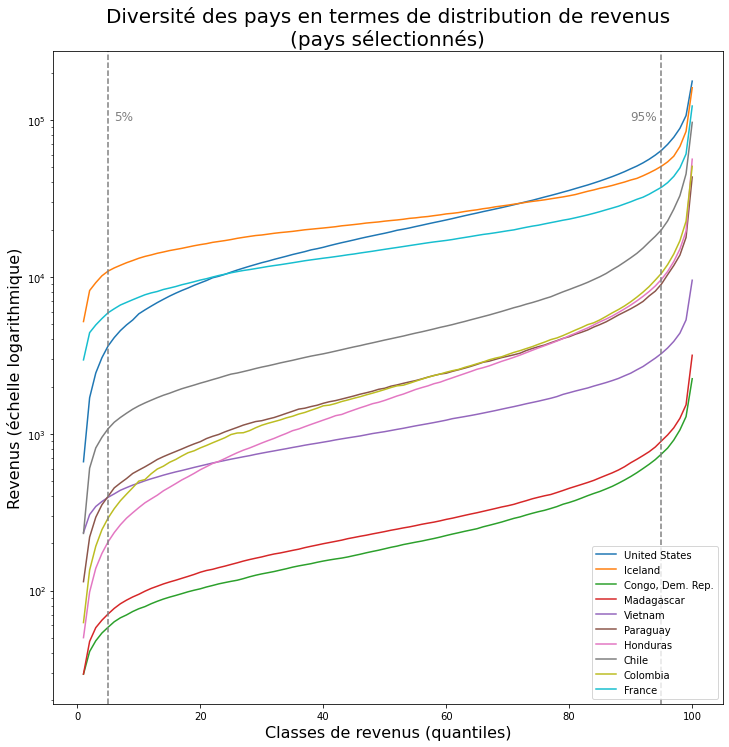

In [42]:
#création d'un graphique avec les 10 pays sélectionnés (quantiles en abscisse, log(income) en ordonnée)

fig = plt.figure(figsize=(12,12))
plt.yscale('log')

plt.plot('quantile', c1, data=sel_count, linestyle='-')
plt.plot('quantile', c2, data=sel_count, linestyle='-')
plt.plot('quantile', c3, data=sel_count, linestyle='-')
plt.plot('quantile', c4, data=sel_count, linestyle='-')
plt.plot('quantile', c5, data=sel_count, linestyle='-')
plt.plot('quantile', c6, data=sel_count, linestyle='-')
plt.plot('quantile', c7, data=sel_count, linestyle='-')
plt.plot('quantile', c8, data=sel_count, linestyle='-')
plt.plot('quantile', c9, data=sel_count, linestyle='-')
plt.plot('quantile', c10, data=sel_count, linestyle='-')

plt.axvline(5, linestyle='--', color='grey')
plt.text(6, 100000, '5%', color='grey', fontsize=12)
plt.axvline(95, linestyle='--', color='grey')
plt.text(90, 100000, '95%', color='grey', fontsize=12)

plt.title('Diversité des pays en termes de distribution de revenus\n(pays sélectionnés)', fontsize=20)
plt.ylabel('Revenus (échelle logarithmique)', fontsize=16)
plt.xlabel('Classes de revenus (quantiles)', fontsize=16)
plt.legend(loc='lower right')

plt.savefig('P7_dist_income.png')
plt.show()

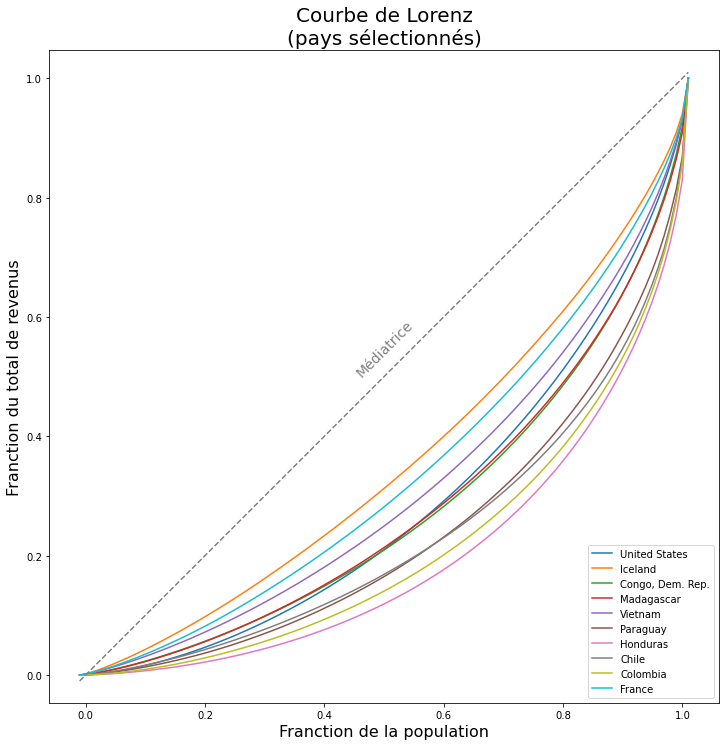

In [43]:
#calcul et graphique de la Courbe de Lorenz pour les 10 pays sélectionnés

n = 100
c1_income = c1_df.values
lorenz1 = np.cumsum(np.sort(c1_income)) / c1_income.sum()
lorenz1 = np.append([0],lorenz1) 

c2_income = c2_df.values
lorenz2 = np.cumsum(np.sort(c2_income)) / c2_income.sum()
lorenz2 = np.append([0],lorenz2) 

c3_income = c3_df.values
lorenz3 = np.cumsum(np.sort(c3_income)) / c3_income.sum()
lorenz3 = np.append([0],lorenz3)

c4_income = c4_df.values
lorenz4 = np.cumsum(np.sort(c4_income)) / c4_income.sum()
lorenz4 = np.append([0],lorenz4)

c5_income = c5_df.values
lorenz5 = np.cumsum(np.sort(c5_income)) / c5_income.sum()
lorenz5 = np.append([0],lorenz5)

c6_income = c6_df.values
lorenz6 = np.cumsum(np.sort(c6_income)) / c6_income.sum()
lorenz6 = np.append([0],lorenz6)

c7_income = c7_df.values
lorenz7 = np.cumsum(np.sort(c7_income)) / c7_income.sum()
lorenz7 = np.append([0],lorenz7)

c8_income = c8_df.values
lorenz8 = np.cumsum(np.sort(c8_income)) / c8_income.sum()
lorenz8 = np.append([0],lorenz8)

c9_income = c9_df.values
lorenz9 = np.cumsum(np.sort(c9_income)) / c9_income.sum()
lorenz9 = np.append([0],lorenz9)

c10_income = c10_df.values
lorenz10 = np.cumsum(np.sort(c10_income)) / c10_income.sum()
lorenz10 = np.append([0],lorenz10)


fig = plt.figure(figsize=(12,12))
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz1, label=c1)
plt.plot(xaxis,lorenz2, label=c2)
plt.plot(xaxis,lorenz3, label=c3)
plt.plot(xaxis,lorenz4, label=c4)
plt.plot(xaxis,lorenz5, label=c5)
plt.plot(xaxis,lorenz6, label=c6)
plt.plot(xaxis,lorenz7, label=c7)
plt.plot(xaxis,lorenz8, label=c8)
plt.plot(xaxis,lorenz9, label=c9)
plt.plot(xaxis,lorenz10, label=c10)

plt.plot(xaxis, xaxis, color='grey', ls='--')
plt.text(0.45, 0.5, 'Médiatrice', fontsize=14, rotation = 45, color ='grey')

plt.title('Courbe de Lorenz\n(pays sélectionnés)', fontsize=20)
plt.xlabel('Franction de la population', fontsize=16)
plt.ylabel('Franction du total de revenus', fontsize=16)
plt.legend(loc='lower right')

plt.savefig('P7_lorenz.png')
plt.show()

In [44]:
#importer la base de données de l'index gini à partir d'un fichier CSV
#source: World Bank
gini_index = pd.DataFrame(pd.read_csv('C:/Users/Oscar Gomez/Desktop/Data Analyst/P7/gini.csv'))

#formatage des données
gini_index.set_index('Country Name', inplace=True)
gini_index = gini_index.drop(columns=['Country Code'])
gini_index = gini_index.transform(lambda x: x / 100)
gini_index = gini_index.transpose()
gini_index.index.name = 'year'

gini_index

Country Name,United States,Vietnam,Chile,Colombia,"Congo, Dem. Rep.",France,Honduras,Iceland,Madagascar,Paraguay
year,,,,,,,,,,
2000,0.401,NaN,0.528,0.587,NaN,0.311,NaN,NaN,NaN,NaN
2001,0.406,NaN,NaN,0.575,NaN,NaN,0.554,NaN,0.474,0.546
2002,0.404,0.370,NaN,0.560,NaN,NaN,0.557,NaN,NaN,0.573
2003,0.408,NaN,0.515,0.536,NaN,0.314,0.581,0.268,NaN,0.549
2004,0.403,0.368,NaN,0.550,0.422,0.306,0.581,0.280,NaN,0.523
2005,0.410,NaN,NaN,0.539,NaN,0.298,0.595,0.290,0.399,0.514
2006,0.414,0.358,0.473,NaN,NaN,0.297,0.575,0.302,NaN,0.530
2007,0.408,NaN,NaN,NaN,NaN,0.324,0.558,0.295,NaN,0.530
2008,0.408,0.356,NaN,0.553,NaN,0.330,0.555,0.318,NaN,0.507


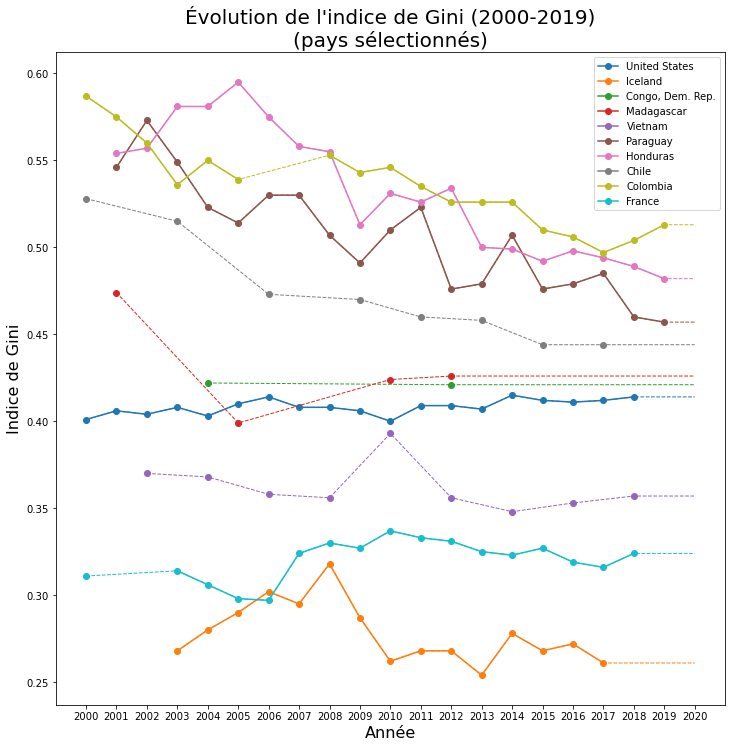

In [45]:
#création d'un graphique de l'evolution du index Gini pour les 10 pays sélectionnés 
#utilisation de la méthode "interpolate" pour les valeurs manquantes

fig, ax = plt.subplots(figsize=(12,12))

line, = ax.plot(gini_index['United States'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['United States'], color=line.get_color(), lw=1.5, marker = 'o', label='United States')

line, = ax.plot(gini_index['Iceland'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['Iceland'], color=line.get_color(), lw=1.5, marker = 'o', label='Iceland')

line, = ax.plot(gini_index['Congo, Dem. Rep.'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['Congo, Dem. Rep.'], color=line.get_color(), lw=1.5, marker = 'o', label='Congo, Dem. Rep.')

line, = ax.plot(gini_index['Madagascar'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['Madagascar'], color=line.get_color(), lw=1.5, marker = 'o', label='Madagascar')

line, = ax.plot(gini_index['Vietnam'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['Vietnam'], color=line.get_color(), lw=1.5, marker = 'o', label='Vietnam')

line, = ax.plot(gini_index['Paraguay'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['Paraguay'], color=line.get_color(), lw=1.5, marker = 'o', label='Paraguay')

line, = ax.plot(gini_index['Honduras'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['Honduras'], color=line.get_color(), lw=1.5, marker = 'o', label='Honduras')

line, = ax.plot(gini_index['Chile'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['Chile'], color=line.get_color(), lw=1.5, marker = 'o', label='Chile')

line, = ax.plot(gini_index['Colombia'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['Colombia'], color=line.get_color(), lw=1.5, marker = 'o', label='Colombia')

line, = ax.plot(gini_index['France'].interpolate(method='linear'), ls = '--', lw = 1)
ax.plot(gini_index['France'], color=line.get_color(), lw=1.5, marker = 'o', label='France')

plt.title('Évolution de l\'indice de Gini (2000-2019)\n(pays sélectionnés)', fontsize=20)
plt.xlabel('Année', fontsize=16)
plt.ylabel('Indice de Gini', fontsize=16)
plt.legend(loc='upper right')

plt.savefig('P7_evoGini.png')
plt.show()

In [46]:
#calcul de l'indice de Gini à l'aide de la data frame WID
income_df = w_inc_dist.pivot(index=['quantile'], columns='country_code', values='income')

lorenz_df = pd.DataFrame(index = income_df.index)
for x in income_df.columns:
    lorenz_df[x] = (np.cumsum(np.sort(income_df[x].values)) / income_df[x].values.sum()).round(4)
    
gini_df = pd.DataFrame()
for y in income_df.columns:
    gini_df[y] = [2*(0.5 - (lorenz_df[y].sum() - lorenz_df[y][100]/2 - lorenz_df[y][1]/2)/n).round(4)]

gini = gini_df.transpose()
gini.reset_index(inplace=True)
gini = gini.rename(columns={0:'gini', 'index': 'country_code'})

gini.head()

,country_code,gini
0,ALB,0.3046
1,ARG,0.4500
2,ARM,0.2632
3,AUT,0.2782
4,AZE,0.3124


In [47]:
#5 pays avec l'indice de Gini le plus élevé
gini_max = gini.sort_values('gini', ascending=False).head().reset_index(drop=True)
gini_max

,country_code,gini
0,ZAF,0.6698
1,HND,0.6016
2,COL,0.5692
3,GTM,0.5682
4,CAF,0.5618


In [48]:
#5 pays avec l'indice de Gini le plus bas
gini_min = gini.sort_values('gini', ascending=False).tail().reset_index(drop=True)
gini_min

,country_code,gini
0,UKR,0.2552
1,SWE,0.2548
2,CZE,0.2528
3,SVK,0.2472
4,SVN,0.2308


In [49]:
#moyenne du index Gini des 5 pays avec les indices les plus élevés et les plus bas
av_max = round(gini_max['gini'].mean(), 2)
av_min = round(gini_min['gini'].mean(), 2)

print('La moyenne des 5 pays ayant l\'indice de Gini le plus élevé est {}'.format(av_max))
print('---------------------------------')
print('La moyenne des 5 pays ayant l\'indice de Gini le plus faible est {}'.format(av_min))


La moyenne des 5 pays ayant l'indice de Gini le plus élevé est 0.59
---------------------------------
La moyenne des 5 pays ayant l'indice de Gini le plus faible est 0.25


In [50]:
#position de la France
gini_sort = gini.sort_values('gini', ascending=False).reset_index(drop=True)
gini_sort[gini_sort['country_code'] == 'FRA']

,country_code,gini
76,FRA,0.3292


La France se classe 77e sur 116 pays, ce qui signifie que la distribution des revenus est meilleure que 65 % des pays de l'échantillon.

In [51]:
#affectation de l'index Gini au dataframe
wid_df = pd.merge(w_inc_dist, gini)
wid_df.head()

,country_code,country_name,quantile,income,gdpppp,population,gini
0,ALB,Albania,1,728.89795,7297.0,2947314.0,0.3046
1,ALB,Albania,2,916.66235,7297.0,2947314.0,0.3046
2,ALB,Albania,3,1010.91600,7297.0,2947314.0,0.3046
3,ALB,Albania,4,1086.90780,7297.0,2947314.0,0.3046
4,ALB,Albania,5,1132.69970,7297.0,2947314.0,0.3046


# MISSION 3

In [52]:
#importer la base de données des revenus IGE à partir d'un fichier CSV
#source: World Bank
gdim = pd.DataFrame(pd.read_csv('C:/Users/Oscar Gomez/Desktop/Data Analyst/P7/gdim.csv'))

#formatage des données
gdim = gdim.drop(columns = ['wbcode', 'incgroup2', 'fragile', 'survey', 'year', 'status', 'cohort', 'parent', 'child',
                            'obs', 'P1', 'P2', 'P3', 'P4', 'P5', 'C1', 'C2', 'C3', 'C4', 'C5', 'MEANp', 'MEANc', 'SDp', 
                            'SDc', 'GINIp', 'GINIc', 'IGP', 'NL1', 'NL2', 'COR', 'MAcatM', 'MAcatC1', 'Q4_IGpri', 'BHQ1', 
                            'BHQ2', 'BHQ3', 'BHQ4', 'Q4BH', 'Q4child', 'Delta50', 'Asher_Q4_IGpri', 'ThreeGen_obs',
                            'ThreeGen_IGPp1', 'ThreeGen_IGPg1', 'ThreeGen_IGPgsd', 'All2125_MEANp', 'All2125_MEANc', 
                            'All2125_IGP', 'All2125_MAcatC1', 'Cores2125_MEANp', 'Cores2125_MEANc', 'Cores2125_IGP', 
                            'Cores2125_MAcatC1', 'Shortfall0611_obs', 'Shortfall0611_IGP', 'Shortfall1217_obs',
                            'Shortfall1217_IGP', 'S1', 'S2', 'S3', 'MLD_psu'])
gdim = gdim.rename(columns={'countryname': 'country_name', 'iso3': 'country_code', 'incgroup4': 'inc_group', 'IGEincome': 'pj'})
gdim['reg_group'] = gdim[['region', 'inc_group']].apply(lambda x: ', '.join(x), axis=1)
gdim.head()

,country_name,country_code,region,inc_group,pj,reg_group
0,Afghanistan,AFG,South Asia,Low income,NaN,"South Asia, Low income"
1,Afghanistan,AFG,South Asia,Low income,NaN,"South Asia, Low income"
2,Afghanistan,AFG,South Asia,Low income,NaN,"South Asia, Low income"
3,Afghanistan,AFG,South Asia,Low income,NaN,"South Asia, Low income"
4,Afghanistan,AFG,South Asia,Low income,NaN,"South Asia, Low income"


In [53]:
#calcul de l'indice IGE par reg_group
gdim_reg = gdim.groupby(['reg_group']).mean()
gdim_reg.reset_index(inplace=True)
gdim_reg.set_index('reg_group', inplace=True)
gdim_reg

,pj
reg_group,
"East Asia & Pacific, Lower middle income",0.527665
"East Asia & Pacific, Upper middle income",0.469500
"Europe & Central Asia, Lower middle income",0.424817
"Europe & Central Asia, Upper middle income",0.477171
"High income, High income",0.348050
"Latin America & Caribbean, Lower middle income",0.940737
"Latin America & Caribbean, Upper middle income",0.878852
"Middle East & North Africa, Lower middle income",0.916461
"Middle East & North Africa, Upper middle income",0.517398


In [54]:
#utiliser les informations du fichier elasticity.txt pour compléter le tableau (Asia - Optimistic)
gdim_reg.loc['South Asia, Upper middle income', 'pj'] = 0.4
gdim_reg

,pj
reg_group,
"East Asia & Pacific, Lower middle income",0.527665
"East Asia & Pacific, Upper middle income",0.469500
"Europe & Central Asia, Lower middle income",0.424817
"Europe & Central Asia, Upper middle income",0.477171
"High income, High income",0.348050
"Latin America & Caribbean, Lower middle income",0.940737
"Latin America & Caribbean, Upper middle income",0.878852
"Middle East & North Africa, Lower middle income",0.916461
"Middle East & North Africa, Upper middle income",0.517398


In [55]:
#calcul de l'indice IGE par country
gdim_c = gdim.groupby(['country_code', 'reg_group']).mean()
gdim_c.reset_index(inplace=True)
gdim_c.set_index('country_code', inplace=True)
gdim_c

,reg_group,pj
country_code,,
AFG,"South Asia, Low income",NaN
AGO,"Sub-Saharan Africa, Upper middle income",NaN
ALB,"Europe & Central Asia, Upper middle income",0.815874
ARG,"Latin America & Caribbean, Upper middle income",NaN
ARM,"Europe & Central Asia, Lower middle income",NaN
...,...,...
VNM,"East Asia & Pacific, Lower middle income",0.480000
VUT,"East Asia & Pacific, Lower middle income",NaN
YEM,"Middle East & North Africa, Lower middle income",NaN


In [56]:
#pays sans index IGE
gdim_c.isnull().sum()

reg_group     0
pj           75
dtype: int64

In [57]:
#remplacer NaN par le string 'null'
gdim_c.fillna('null', inplace=True)
gdim_c.head(10)

,reg_group,pj
country_code,,
AFG,"South Asia, Low income",null
AGO,"Sub-Saharan Africa, Upper middle income",null
ALB,"Europe & Central Asia, Upper middle income",0.815874
ARG,"Latin America & Caribbean, Upper middle income",null
ARM,"Europe & Central Asia, Lower middle income",null
AUS,"High income, High income",0.275
AUT,"High income, High income",0.245267
AZE,"Europe & Central Asia, Upper middle income",null
BEL,"High income, High income",0.183176


In [58]:
#attribuer l'indice IGE régional aux pays sans indice IGE
countries = gdim_c.index
for i in countries:
    if gdim_c.loc[i,'pj'] == 'null':    
        gdim_c.loc[i,'pj'] = gdim_reg.loc[gdim_c.loc[i,'reg_group'],'pj']
        
gdim_c.head(10)

,reg_group,pj
country_code,,
AFG,"South Asia, Low income",0.436
AGO,"Sub-Saharan Africa, Upper middle income",0.677
ALB,"Europe & Central Asia, Upper middle income",0.815874
ARG,"Latin America & Caribbean, Upper middle income",0.878852
ARM,"Europe & Central Asia, Lower middle income",0.424817
AUS,"High income, High income",0.275
AUT,"High income, High income",0.245267
AZE,"Europe & Central Asia, Upper middle income",0.477171
BEL,"High income, High income",0.183176


In [59]:
#pays sans indice IGE après affectation
gdim_c.isnull().sum()

reg_group    0
pj           0
dtype: int64

In [60]:
#Ajout de l'index IGE à la dataframe
gdim_c.reset_index(inplace=True)

wid_df = pd.merge(wid_df, gdim_c, how='left')
wid_df.head()

,country_code,country_name,quantile,income,gdpppp,population,gini,reg_group,pj
0,ALB,Albania,1,728.89795,7297.0,2947314.0,0.3046,"Europe & Central Asia, Upper middle income",0.815874
1,ALB,Albania,2,916.66235,7297.0,2947314.0,0.3046,"Europe & Central Asia, Upper middle income",0.815874
2,ALB,Albania,3,1010.91600,7297.0,2947314.0,0.3046,"Europe & Central Asia, Upper middle income",0.815874
3,ALB,Albania,4,1086.90780,7297.0,2947314.0,0.3046,"Europe & Central Asia, Upper middle income",0.815874
4,ALB,Albania,5,1132.69970,7297.0,2947314.0,0.3046,"Europe & Central Asia, Upper middle income",0.815874


In [61]:
#taille de la data frame après affectation
wid_df.shape

(11600, 9)

In [62]:
#valeurs manquantes
wid_df.isnull().sum()

country_code      0
country_name      0
quantile          0
income            0
gdpppp            0
population        0
gini              0
reg_group       200
pj              200
dtype: int64

In [63]:
#trouver les pays sans pj
df3 = wid_df.groupby(by=['country_name','country_code']).nunique()
df3[df3['pj']<1]

,,quantile,income,gdpppp,population,gini,reg_group,pj
country_name,country_code,,,,,,,
Kosovo,XKX,100,100,1,1,1,0,0
Syrian Arab Republic,SYR,100,100,1,1,1,0,0


In [64]:
#liste des pays de la dataframe de l'indice IGE
gdim['country_name'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina',
       'Belarus', 'Bolivia', 'Brazil', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cabo Verde', 'Costa Rica', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Greece', 'Guatemala', 'Honduras',
       'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iran, Islamic Rep.', 'Iraq', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic',
       'Cambodia', 'Kiribati', 'Kor

In [65]:
#recherche du Kosovo dans la data frame de l'index IGE
gdim[gdim['country_name']=='Kosovo'].head(1)

,country_name,country_code,region,inc_group,pj,reg_group
3248,Kosovo,KSV,Europe & Central Asia,Lower middle income,NaN,"Europe & Central Asia, Lower middle income"


In [66]:
#affectation manuelle de reg_group et pj
wid_df.loc[wid_df['country_code'] == 'XKX', 'reg_group'] = 'Europe & Central Asia, Lower middle income'
wid_df.loc[wid_df['country_code'] == 'XKX', 'pj'] = 0.424817

wid_df[wid_df['country_name']=='Kosovo'].head()

,country_code,country_name,quantile,income,gdpppp,population,gini,reg_group,pj
11300,XKX,Kosovo,1,437.89370,7538.09,1747383.0,0.3144,"Europe & Central Asia, Lower middle income",0.424817
11301,XKX,Kosovo,2,508.17133,7538.09,1747383.0,0.3144,"Europe & Central Asia, Lower middle income",0.424817
11302,XKX,Kosovo,3,591.82820,7538.09,1747383.0,0.3144,"Europe & Central Asia, Lower middle income",0.424817
11303,XKX,Kosovo,4,668.00000,7538.09,1747383.0,0.3144,"Europe & Central Asia, Lower middle income",0.424817
11304,XKX,Kosovo,5,730.40220,7538.09,1747383.0,0.3144,"Europe & Central Asia, Lower middle income",0.424817


In [67]:
#pour la Syrie selon le World Bank: Income level: Low income, and Region: Middle East & North Africa
#affectation manuelle de reg_group et pj
wid_df.loc[wid_df['country_code'] == 'SYR', 'reg_group'] = 'Middle East & North Africa, Lower middle income'
wid_df.loc[wid_df['country_code'] == 'SYR', 'pj'] = 0.916461

wid_df[wid_df['country_name']=='Syrian Arab Republic'].head()

,country_code,country_name,quantile,income,gdpppp,population,gini,reg_group,pj
10000,SYR,Syrian Arab Republic,1,143.18066,4512.0,20664037.0,0.3576,"Middle East & North Africa, Lower middle income",0.916461
10001,SYR,Syrian Arab Republic,2,179.06183,4512.0,20664037.0,0.3576,"Middle East & North Africa, Lower middle income",0.916461
10002,SYR,Syrian Arab Republic,3,195.83022,4512.0,20664037.0,0.3576,"Middle East & North Africa, Lower middle income",0.916461
10003,SYR,Syrian Arab Republic,4,210.05444,4512.0,20664037.0,0.3576,"Middle East & North Africa, Lower middle income",0.916461
10004,SYR,Syrian Arab Republic,5,222.11244,4512.0,20664037.0,0.3576,"Middle East & North Africa, Lower middle income",0.916461


In [68]:
#valeurs manquantes après corrections
wid_df.isnull().sum()

country_code    0
country_name    0
quantile        0
income          0
gdpppp          0
population      0
gini            0
reg_group       0
pj              0
dtype: int64

In [69]:
#fonctions apportées par OpenClassrooms

def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
    
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure(figsize=(12,12))
    
    # La ligne suivante sert à afficher un graphique en "stack bars"
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("pj=" + str(p), fontsize=20)
    plt.legend()
    plt.xlabel("Quantile parents", fontsize=16)
    plt.ylabel("Probabilité du quantile enfant", fontsize=16)
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]


In [70]:
#paramètres communs
nb_quantiles = 10
n = 1000*nb_quantiles

In [71]:
#simulation pour un pays à faible mobilité pj=0.9
y_child_low, y_parents_low = generate_incomes(n, 0.9)

sample_low = compute_quantiles(y_child_low, y_parents_low, nb_quantiles)
sample_low

,y_child,y_parents,c_i_child,c_i_parent
0,0.256641,0.276566,2,2
1,0.594662,2.000385,4,8
2,0.908481,0.463672,5,3
3,0.536962,0.267387,4,1
4,36.488867,8.723280,10,10
...,...,...,...,...
9995,2.914110,1.444210,8,7
9996,1.084218,1.374370,6,7
9997,0.455726,1.267752,3,6
9998,0.353943,0.362710,3,2


In [72]:
cd_low = conditional_distributions(sample_low, nb_quantiles)
cd_low

array([[0.434, 0.216, 0.138, 0.082, 0.062, 0.038, 0.018, 0.008, 0.003,
        0.001],
       [0.205, 0.204, 0.17 , 0.126, 0.108, 0.074, 0.052, 0.036, 0.019,
        0.006],
       [0.128, 0.166, 0.14 , 0.158, 0.118, 0.107, 0.09 , 0.045, 0.036,
        0.012],
       [0.103, 0.15 , 0.14 , 0.152, 0.133, 0.108, 0.081, 0.075, 0.041,
        0.017],
       [0.055, 0.094, 0.137, 0.112, 0.137, 0.125, 0.129, 0.097, 0.083,
        0.031],
       [0.037, 0.066, 0.101, 0.113, 0.124, 0.128, 0.129, 0.122, 0.124,
        0.056],
       [0.017, 0.052, 0.081, 0.101, 0.122, 0.14 , 0.131, 0.154, 0.118,
        0.084],
       [0.016, 0.03 , 0.049, 0.086, 0.097, 0.115, 0.144, 0.158, 0.162,
        0.143],
       [0.005, 0.017, 0.034, 0.053, 0.068, 0.101, 0.14 , 0.17 , 0.198,
        0.214],
       [0.   , 0.005, 0.01 , 0.017, 0.031, 0.064, 0.086, 0.135, 0.216,
        0.436]])

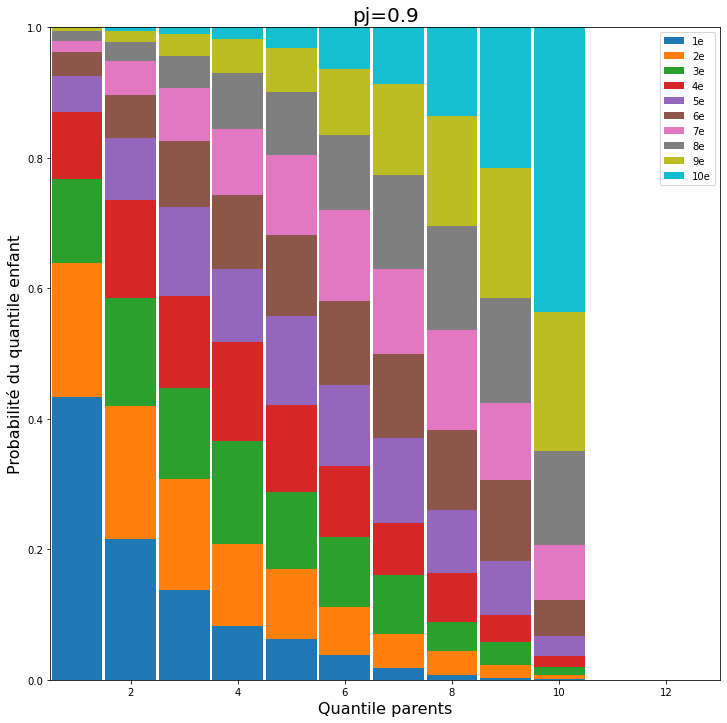

<Figure size 432x288 with 0 Axes>

In [73]:
plot_conditional_distributions(0.9, cd_low, nb_quantiles)
plt.savefig('P7_mob_low.png')

In [74]:
#simulation pour un pays à forte mobilité pj=0.2
y_child_high, y_parents_high = generate_incomes(n, 0.2)

sample_high = compute_quantiles(y_child_high, y_parents_high, nb_quantiles)
sample_high

,y_child,y_parents,c_i_child,c_i_parent
0,4.012142,0.838315,10,5
1,0.861800,0.675832,5,4
2,1.039453,4.008758,6,10
3,1.086006,2.517633,6,9
4,0.490356,2.553836,3,9
...,...,...,...,...
9995,0.533515,0.949816,3,5
9996,1.120405,3.728798,6,10
9997,1.491961,0.808252,7,5
9998,1.840596,0.136218,8,1


In [75]:
cd_high = conditional_distributions(sample_high, nb_quantiles)
cd_high

array([[0.171, 0.118, 0.131, 0.101, 0.103, 0.09 , 0.081, 0.084, 0.067,
        0.054],
       [0.138, 0.123, 0.105, 0.106, 0.105, 0.096, 0.087, 0.09 , 0.083,
        0.067],
       [0.114, 0.124, 0.096, 0.109, 0.1  , 0.1  , 0.093, 0.105, 0.073,
        0.086],
       [0.104, 0.102, 0.111, 0.114, 0.117, 0.101, 0.093, 0.089, 0.08 ,
        0.089],
       [0.117, 0.101, 0.105, 0.103, 0.101, 0.1  , 0.102, 0.09 , 0.099,
        0.082],
       [0.071, 0.1  , 0.112, 0.11 , 0.103, 0.099, 0.099, 0.103, 0.1  ,
        0.103],
       [0.096, 0.087, 0.106, 0.101, 0.091, 0.096, 0.105, 0.11 , 0.105,
        0.103],
       [0.069, 0.091, 0.085, 0.098, 0.09 , 0.112, 0.11 , 0.108, 0.109,
        0.128],
       [0.062, 0.083, 0.077, 0.093, 0.089, 0.096, 0.126, 0.106, 0.13 ,
        0.138],
       [0.058, 0.071, 0.072, 0.065, 0.101, 0.11 , 0.104, 0.115, 0.154,
        0.15 ]])

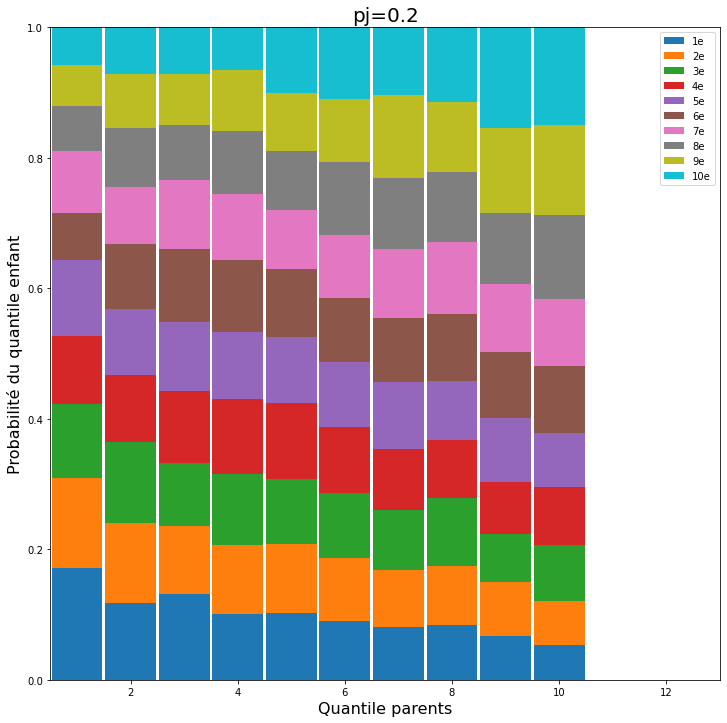

<Figure size 432x288 with 0 Axes>

In [76]:
plot_conditional_distributions(0.2, cd_high, nb_quantiles)
plt.savefig('P7_mob_high.png')

In [77]:
#formatage des données
wid_ok = wid_df.drop(columns=['country_code', 'gdpppp', 'population', 'reg_group'])
wid_ok.rename(columns = {'quantile': 'ci_child', 'income': 'yi_child', 'gini': 'Gj'}, inplace=True)

#clonage de données
wid_ok = pd.concat([wid_ok] * 500)
wid_ok.sort_values(by=['country_name', 'ci_child'], inplace=True)

wid_ok.head()

,country_name,ci_child,yi_child,Gj,pj
0,Albania,1,728.89795,0.3046,0.815874
0,Albania,1,728.89795,0.3046,0.815874
0,Albania,1,728.89795,0.3046,0.815874
0,Albania,1,728.89795,0.3046,0.815874
0,Albania,1,728.89795,0.3046,0.815874


In [78]:
nb_quantiles = 100
n = 1000*nb_quantiles

countries = wid_ok['country_name'].unique()

#création de la colonne ci_parent dans la base de données
wid_ok['ci_parent'] = 0

#démarrer une liste vide ci_parent
ci_parent = []

#pour chaque pays
for j in countries:
    #simulation de revenus
    y_child, y_parent = generate_incomes(n, wid_ok.loc[wid_ok['country_name'] == j, 'pj'].iloc[0]) 
    #quantiles
    sample = compute_quantiles(y_child, y_parent, nb_quantiles) 
    #distributions conditionnelles et nombre attendu des individus par classe de revenu
    cd = np.round(conditional_distributions(sample, nb_quantiles)*500)
    #arrondir à un entier
    cd = np.array(cd, int)
    #cd à dataframe
    cdd = pd.DataFrame(cd)
    #matrice transposée
    cdt = cdd.T

    #pour chaque ci_child
    for cic in np.arange(100):
    #création d'une liste d'index lorsque les valeurs sont supérieures à 5
        list_random = cdt.loc[cdt[cic] > 5, cic].index.tolist()

        #si la somme des individus par pays et ci_child est inférieure à 500 individus
        if cdd.loc[cdd.index == cic].sum().sum() < 500:        
        
            diff = 500 - cdd.loc[cdd.index == cic].sum().sum()
            al_ind = rdm.sample(list_random, diff)        
            cdd.loc[cdd.index == cic, al_ind] = cdd.loc[cdd.index == cic, al_ind] + 1
        
        #si la somme des individus par pays et ci_child est supérieure à 500 individus
        elif cdd.loc[cdd.index == cic].sum().sum() > 500:
       
            diff = cdd.loc[cdd.index == cic].sum().sum() - 500
            al_ind = rdm.sample(list_random, diff)
            cdd.loc[cdd.index == cic, al_ind] = cdd.loc[cdd.index == cic, al_ind] - 1
     
        #pour chaque ci_parent
        for cip in range(0,100):       
            ci_parent.extend(np.repeat(cip + 1, cdd.iloc[cic, cip], axis=0))
        
    #affectation de la liste ci_parent à la colonne ci_parent du dataframe
    wid_ok.loc[(wid_ok['country_name'] == j), 'ci_parent'] = ci_parent
    
    #réinitialiser la liste ci_parent
    ci_parent =[]

In [79]:
wid_ok.head()

,country_name,ci_child,yi_child,Gj,pj,ci_parent
0,Albania,1,728.89795,0.3046,0.815874,1
0,Albania,1,728.89795,0.3046,0.815874,1
0,Albania,1,728.89795,0.3046,0.815874,1
0,Albania,1,728.89795,0.3046,0.815874,1
0,Albania,1,728.89795,0.3046,0.815874,1


In [80]:
#taille de la data frame après affectation
wid_ok.shape

(5800000, 6)

In [81]:
#effacer la colonne ci_child, inutile pour la mission 4
wid_ok = wid_ok.drop(columns=['ci_child'])
wid_ok.head()


,country_name,yi_child,Gj,pj,ci_parent
0,Albania,728.89795,0.3046,0.815874,1
0,Albania,728.89795,0.3046,0.815874,1
0,Albania,728.89795,0.3046,0.815874,1
0,Albania,728.89795,0.3046,0.815874,1
0,Albania,728.89795,0.3046,0.815874,1


In [82]:
#revenu moyen par pays
avg_income = wid_ok.groupby(by='country_name').mean()
avg_income = avg_income.drop(columns=['Gj', 'ci_parent'])
avg_income.rename(columns = {'yi_child': 'mj'}, inplace=True)
avg_income.reset_index(inplace=True)
avg_income.head()

,country_name,mj
0,Albania,2994.829902
1,Argentina,5847.884654
2,Armenia,1628.382785
3,Austria,16637.600204
4,Azerbaijan,2357.429023


In [83]:
#joindre le revenu moyen au data frame
WID_df = pd.merge(wid_ok, avg_income, on='country_name')
WID_df.head()

,country_name,yi_child,Gj,pj,ci_parent,mj
0,Albania,728.89795,0.3046,0.815874,1,2994.829902
1,Albania,728.89795,0.3046,0.815874,1,2994.829902
2,Albania,728.89795,0.3046,0.815874,1,2994.829902
3,Albania,728.89795,0.3046,0.815874,1,2994.829902
4,Albania,728.89795,0.3046,0.815874,1,2994.829902


In [84]:
#ajout de colonnes log pour yi_child et mj
WID_df['ln_yi_child'] = np.log(WID_df['yi_child'])
WID_df['ln_mj'] = np.log(WID_df['mj'])

WID_df.head()

,country_name,yi_child,Gj,pj,ci_parent,mj,ln_yi_child,ln_mj
0,Albania,728.89795,0.3046,0.815874,1,2994.829902,6.591534,8.004643
1,Albania,728.89795,0.3046,0.815874,1,2994.829902,6.591534,8.004643
2,Albania,728.89795,0.3046,0.815874,1,2994.829902,6.591534,8.004643
3,Albania,728.89795,0.3046,0.815874,1,2994.829902,6.591534,8.004643
4,Albania,728.89795,0.3046,0.815874,1,2994.829902,6.591534,8.004643


In [85]:
#taille de la data frame après affectation
WID_df.shape

(5800000, 8)

# **MISSION 4**

## Anova

Model: $y_{i,j} = \mu + \alpha_j + \varepsilon_i$

On veut savoir si le revenu moyen est égal entre les pays (c'est-à-dire que le pays n'a aucune influence sur le revenu de l'enfant) 
$$ H_0: \alpha_1 = \alpha_2 = \alpha_3 = \dots = \alpha_J $$
$$ H_1: \neg  H_0 $$

In [86]:
#niveau de confiance 
alpha = 0.5

In [87]:
#réduction du nombre de données pour faciliter les calculs 
#par niveau de revenu il y a 500 lignes avec les mêmes informations des variables qui nous intéressent

WID_1 = WID_df.groupby(by=['country_name', 'yi_child']).mean()
WID_1.drop(columns=['ci_parent'], inplace=True)
WID_1.reset_index(inplace=True)
WID_1 = WID_1[['country_name', 'yi_child', 'ln_yi_child', 'mj', 'ln_mj', 'Gj']]
WID_1

,country_name,yi_child,ln_yi_child,mj,ln_mj,Gj
0,Albania,728.89795,6.591534,2994.829902,8.004643,0.3046
1,Albania,916.66235,6.820739,2994.829902,8.004643,0.3046
2,Albania,1010.91600,6.918612,2994.829902,8.004643,0.3046
3,Albania,1086.90780,6.991092,2994.829902,8.004643,0.3046
4,Albania,1132.69970,7.032359,2994.829902,8.004643,0.3046
...,...,...,...,...,...,...
11595,"Yemen, Rep.",2568.65110,7.851136,1042.635870,6.949507,0.3742
11596,"Yemen, Rep.",2893.90400,7.970362,1042.635870,6.949507,0.3742
11597,"Yemen, Rep.",3307.27220,8.103879,1042.635870,6.949507,0.3742
11598,"Yemen, Rep.",4137.02640,8.327733,1042.635870,6.949507,0.3742


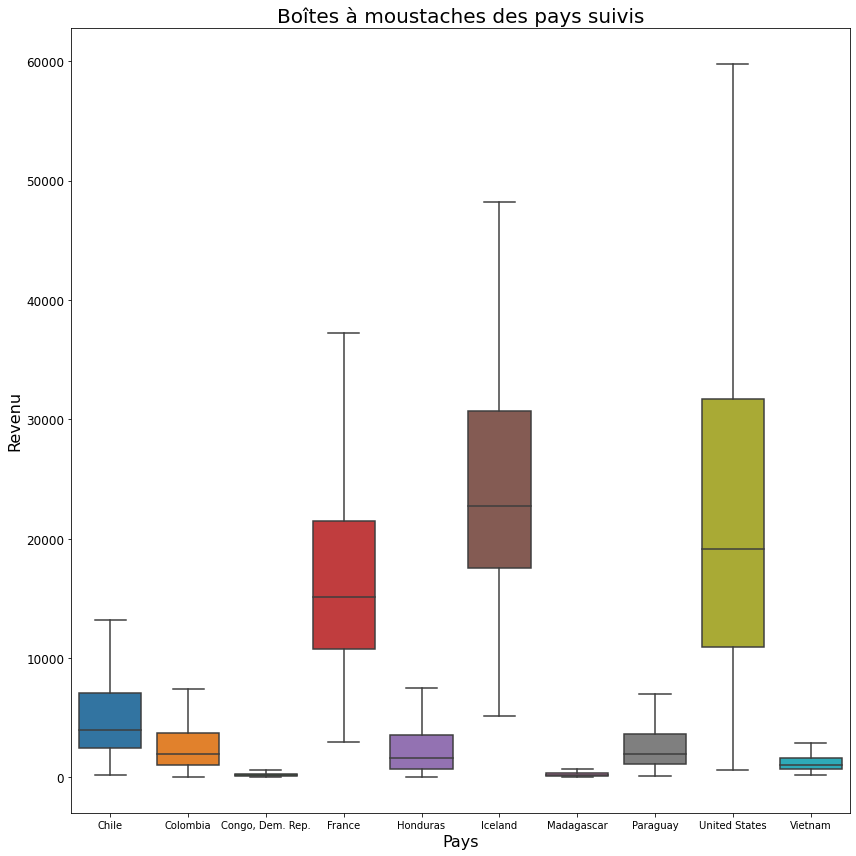

In [88]:
#création d'un graphique pour montrer les différences de revenus des pays sélectionnés
WID_select = WID_1.loc[(WID_1['country_name'] == 'United States') | (WID_1['country_name'] == 'Iceland') | 
                       (WID_1['country_name'] == 'Congo, Dem. Rep.') | (WID_1['country_name'] == 'Madagascar') | 
                       (WID_1['country_name'] == 'Vietnam') | (WID_1['country_name'] == 'Paraguay') | 
                       (WID_1['country_name'] == 'Honduras') | (WID_1['country_name'] == 'Chile') | 
                       (WID_1['country_name'] == 'Colombia') | (WID_1['country_name'] == 'France')]

plt.figure(figsize=(12,12))

ax = sns.boxplot(x='country_name', y='yi_child', data=WID_select, showfliers=False)

plt.ylabel('Revenu', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('Pays', fontsize=16)
plt.xticks(fontsize=10)
plt.title('Boîtes à moustaches des pays suivis', fontsize=20)

plt.tight_layout()

plt.savefig('boxplot_anova.png')
plt.show()

In [89]:
anova1 = ols('yi_child~country_name', data=WID_1).fit(alpha=alpha)
anova1.summary().tables[0]

Dep. Variable:,yi_child,R-squared:,0.496
Model:,OLS,Adj. R-squared:,0.491
Method:,Least Squares,F-statistic:,98.43
Date:,"Mon, 10 Jan 2022",Prob (F-statistic):,0.00
Time:,16:27:16,Log-Likelihood:,-1.1862e+05
No. Observations:,11600,AIC:,2.375e+05
Df Residuals:,11484,BIC:,2.383e+05
Df Model:,115,,
Covariance Type:,nonrobust,,


$ R^2 = 0.496 $ et $ R^2_{adj} = 0.491 $ par conséquent, ce modèle explique presque les 50% de la variation totale de la variable dépendante, les autres facteurs expliquent l'autre moitié du comportement de revenu de l'enfant.

In [90]:
anova_table1 = sm.stats.anova_lm(anova1, typ=2)
anova_table1

,sum_sq,df,F,PR(>F)
country_name,5.102375e+11,115.0,98.429271,0.0
Residual,5.176586e+11,11484.0,NaN,NaN


Etant donné que la $p-valeur<\alpha$, on peut rejeter $H_0$, donc le pays de naissance influence le revenu des individus.

## Linear Regressions

### Model 1
$ y_{i,j} = \alpha + \beta_1 G_j + \beta_2 m_j + \varepsilon_i $

In [91]:
reg1 = ols('yi_child ~ Gj + mj', data=WID_df)
reg_multi1 = reg1.fit()
reg_multi1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               yi_child   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.858e+06
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:27:22   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799997   BIC:                         1.186e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.267e-08     14.059  -9.01e-10      1.000     -27.555      27.555
Gj          3.238e-08     33.198   9.75e-10      1.000     -65.068      65.068
mj             1.0000      0.000   2234.846      0.000       0.999       1.001
==============================================================================
Omnibus:                  7299083.278   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2103715771.079
Skew:                           6.739   Prob(JB):                         0.00
Kurtosis:                      95.322   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#tester colinearité
variables1 = reg_multi1.model.exog
[variance_inflation_factor(variables1, i) for i in np.arange(1,variables1.shape[1])]

[1.1446202186922125, 1.144620218692641]

In [93]:
#tester homoscédasticité
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg_multi1.resid, variables1)
print('p-value test Breusch Pagan:', pval)

p-value test Breusch Pagan: 0.0


In [94]:
#tester normalité des residus
st.shapiro(reg_multi1.resid)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5629792213439941, pvalue=0.0)

In [95]:
#le test de Shapiro n'est pas adéquat pour nos données car elles sont très nombreuses (> 5000)
#test de Jarque-Bera
JB1, JBpv1, skw1, kurt1 = sm.stats.stattools.jarque_bera(reg_multi1.resid)
JB1, JBpv1, skw1, kurt1

(2103715771.0793633, 0.0, 6.73933935607315, 95.32202335875692)

### Model 2
$ \ln(y_{i,j}) = \alpha + \beta_1 G_j + \beta_2 \ln(m_j) + \varepsilon_i $

In [96]:
reg2 = ols('ln_yi_child ~ Gj + ln_mj', data=WID_df)
reg_multi2 = reg2.fit()
reg_multi2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_yi_child   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 7.793e+06
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:27:36   Log-Likelihood:            -6.3181e+06
No. Observations:             5800000   AIC:                         1.264e+07
Df Residuals:                 5799997   BIC:                         1.264e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4635      0.003    162.339      0.000       0.458       0.469
Gj            -1.6359      0.003   -471.875      0.000      -1.643      -1.629
ln_mj          0.9864      0.000   3651.001      0.000       0.986       0.987
==============================================================================
Omnibus:                   372804.560   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1752484.056
Skew:                          -0.081   Prob(JB):                         0.00
Kurtosis:                       5.688   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
#tester colinearité
variables2 = reg_multi2.model.exog
[variance_inflation_factor(variables2, i) for i in np.arange(1,variables2.shape[1])]

[1.0769268705866593, 1.076926870587142]

In [98]:
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg_multi2.resid, variables1)
print('p-value test Breusch Pagan:', pval)

p-value test Breusch Pagan: 0.0


In [99]:
#test de Jarque-Bera
JB2, JBpv2, skw2, kurt2 = sm.stats.stattools.jarque_bera(reg_multi2.resid)
JB2, JBpv2, skw2, kurt2

(1752484.056124837, 0.0, -0.08089680403108253, 5.688025481959837)

Aucun des modèles n'a de problèmes de colinéarité, et bien que le $H_0$ pour l'homoscédasticité soit rejeté dans les deux modèles, les estimateurs restent sans biais, bien qu'ils ne soient pas les plus efficaces.

De même, l'hypothèse de normalité est rejetée pour les deux modèles (valeur-p du test de Jarque-Bera ~ 0), cependant le fait que l'échantillon soit de taille suffisante ($n>30$) permet de dire que les résultats obtenus par les modèles linéaires ne sont pas absurdes, même si le résidu ne suivent pas une loi normale.

Les deux modèles sont globalement significatifs (la p-valeur du test de Fisher $\rightarrow 0$), cependant le second modèle a un meilleur $R^2$ et les deux critères d'information, AIC et BIC, ont des valeurs plus faibles. Par conséquent, la deuxième version est plus performante.

### Analyse de la variance expliquée

In [100]:
anova2 = sm.stats.anova_lm(reg_multi2, typ=1)
anova2

,df,sum_sq,mean_sq,F,PR(>F)
Gj,1.0,1.167437e+06,1.167437e+06,2.256964e+06,0.0
ln_mj,1.0,6.894975e+06,6.894975e+06,1.332981e+07,0.0
Residual,5799997.0,3.000105e+06,5.172598e-01,NaN,NaN


In [101]:
#R2 for Gj
r2_Gj = anova2.loc['Gj', 'sum_sq'] / anova2['sum_sq'].sum()
r2_Gj

0.10553083876145715

In [102]:
#R2 for ln_mj
r2_mj = anova2.loc['ln_mj', 'sum_sq'] / anova2['sum_sq'].sum()
r2_mj

0.623273611698389

Ce modèle explique 72,9% de la variance totale de $ln(y_{i,child})$, les variables $G_j$ et $ln(m_j)$ expliquent respectivement 10,6% et 62,3%. Les autres facteurs non pris en compte dans le modèle expliquent le 27,1% restant.

### Model 3
$ y_{i,j} = \alpha + \beta_1 G_j + \beta_2 m_j + \beta_3 c_{i,parent} + \varepsilon_i $

In [103]:
reg3 = ols('yi_child ~ Gj + mj + ci_parent', data=WID_df)
reg_multi3 = reg3.fit()
reg_multi3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               yi_child   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 2.114e+06
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:27:54   Log-Likelihood:            -5.9157e+07
No. Observations:             5800000   AIC:                         1.183e+08
Df Residuals:                 5799996   BIC:                         1.183e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2654.1580     14.485   -183.229      0.000   -2682.549   -2625.767
Gj             0.8909     32.332      0.028      0.978     -62.479      64.260
mj             1.0000      0.000   2294.775      0.000       0.999       1.001
ci_parent     52.5483      0.094    561.278      0.000      52.365      52.732
==============================================================================
Omnibus:                  7408118.387   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2321864566.228
Skew:                           6.902   Prob(JB):                         0.00
Kurtosis:                     100.042   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
#tester colinearité
variables3 = reg_multi3.model.exog
[variance_inflation_factor(variables3, i) for i in np.arange(1,variables3.shape[1])]

[1.144620221451497, 1.1446202237305745, 1.0000000051461264]

In [105]:
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg_multi3.resid, variables1)
print('p-value test Breusch Pagan:', pval)

p-value test Breusch Pagan: 0.0


In [106]:
#test de Jarque-Bera
JB3, JBpv3, skw3, kurt3 = sm.stats.stattools.jarque_bera(reg_multi3.resid)
JB3, JBpv3, skw3, kurt3

(2321864566.22758, 0.0, 6.901696042458244, 100.04216513149846)

### Model 4
$ \ln(y_{i,j}) = \alpha + \beta_1 G_j + \beta_2 \ln(m_j) + \beta_3 c_{i,parent} + \varepsilon_i $

In [107]:
reg4 = ols('ln_yi_child ~ Gj + ln_mj + ci_parent', data=WID_df)
reg_multi4 = reg4.fit()
reg_multi4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_yi_child   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 7.061e+06
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:28:14   Log-Likelihood:            -5.6441e+06
No. Observations:             5800000   AIC:                         1.129e+07
Df Residuals:                 5799996   BIC:                         1.129e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1100      0.003    -42.554      0.000      -0.115      -0.105
Gj            -1.6358      0.003   -529.976      0.000      -1.642      -1.630
ln_mj          0.9864      0.000   4101.027      0.000       0.986       0.987
ci_parent      0.0114   9.21e-06   1231.939      0.000       0.011       0.011
==============================================================================
Omnibus:                   389596.549   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1824162.783
Skew:                          -0.132   Prob(JB):                         0.00
Kurtosis:                       5.735   Cond. No.                         811.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#tester colinearité
variables4 = reg_multi4.model.exog
[variance_inflation_factor(variables4, i) for i in np.arange(1,variables4.shape[1])]

[1.076926872576533, 1.0769268747812109, 1.0000000046393012]

In [109]:
#tester homocedasticité
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(reg_multi4.resid, variables1)
print('p-value test Breusch Pagan:', pval)

p-value test Breusch Pagan: 0.0


In [110]:
#test de Jarque-Bera
JB4, JBpv4, skw4, kurt4 = sm.stats.stattools.jarque_bera(reg_multi4.resid)
JB4, JBpv4, skw4, kurt4

(1824162.782701817, 0.0, -0.13220316708185267, 5.734657031685032)

Comme les modèles 1 et 2, les modèles 3 et 4 n'ont pas de problèmes de colinéarité, cependant ils présentent des problèmes d'hétéroscédasticité et les erreurs ne suivent pas une loi normale, cependant les résultats sont valables grâce au grand nombre de données ($n>30$).

Les deux modèles sont globalement significatifs (la p-valeur du test de Fisher  $\rightarrow 0$ ), cependant le second modèle a un meilleur  $𝑅^2$  et les deux critères d'information, AIC et BIC, ont des valeurs plus faibles. Par conséquent, le modèle 4 est plus performante.

De même, le modèle 4 a un meilleur ajustement que le modèle 2 ($R^2_2 > R^2_4$).

### Analyse de la variance expliquée

In [111]:
anova3 = sm.stats.anova_lm(reg_multi4, typ=1)
anova3

,df,sum_sq,mean_sq,F,PR(>F)
Gj,1.0,1.167437e+06,1.167437e+06,2.847539e+06,0.0
ln_mj,1.0,6.894975e+06,6.894975e+06,1.681779e+07,0.0
ci_parent,1.0,6.222172e+05,6.222172e+05,1.517673e+06,0.0
Residual,5799996.0,2.377888e+06,4.099810e-01,NaN,NaN


In [112]:
#R2 for Gj
r2_Gj = anova3.loc['Gj', 'sum_sq'] / anova3['sum_sq'].sum()
r2_Gj

0.10553083876139527

In [113]:
#R2 for ln_mj
r2_mj = anova3.loc['ln_mj', 'sum_sq'] / anova3['sum_sq'].sum()
r2_mj

0.6232736116985669

In [114]:
#R2 for ci_parent
r2_cip = anova3.loc['ci_parent', 'sum_sq'] / anova3['sum_sq'].sum()
r2_cip

0.05624553718932912

Le modèle 4 explique le 78,5% de la variabilitée de la variable dépendante, le log du revenu moyen ($\ln(m_j)$), l'indice de Gini ($G_j$) et la classe de revenu des parents ($c_{i,parent}$) expliquent respectivement le 10.6%, 62.3% et 5.6%.